### Problem Statement - Predicting 
Target Variable > i3_health
Predictor Variables > symptoms (i5_health_1, i5_health_2, i5_health_3, i5_health_4, i5_health_5) and covid-19 exposure (i4_health, i12_health_5)

### Importing Libraries & Packages

In [1]:
import numpy as np
import pandas as pd

import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Data Preprocessing

In [3]:
# read the dataset
covid = pd.read_csv('COVID-19BehaviorData_CAN_USA.csv')

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28825 non-null  object 
 8   i4_health           28825 non-null  object 
 9   i5_health_1         28825 non-null  object 
 10  i5_health_2         28825 non-null  object 
 11  i5_health_3         28825 non-null  object 
 12  i5_health_4         28825 non-null  object 
 13  i5_health_5         28825 non-null  object 
 14  i5_health_99        28825 non-null  object 
 15  i5a_health          28825 non-null  object 
 16  i6_h

In [5]:
covid.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,...,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,...,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,...,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed


In [6]:
#dropping unnecessary columns
covid.drop(columns=['Index','endtime','qweek', 'i1_health','i2_health','i7a_health', 'i5_health_99', 'i5a_health', 'i6_health', 'i7b_health', 'i8_health', 'i9_health', 'i10_health', 'i11_health', 'i12_health_1','i12_health_2','i12_health_3','i12_health_4', 'i12_health_6', 'i12_health_7', 'i12_health_8', 'i12_health_9','i12_health_10', 'i12_health_11', 'i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_19', 'i12_health_20', 'i13_health','i14_health_1','i14_health_2','i14_health_3','i14_health_4','i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96','i14_health_98','i14_health_99','i14_health_other','d1_health_1', 'd1_health_2','d1_health_3', 'd1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9','d1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_98','d1_health_99','weight','age','gender','household_size','household_children','employment_status','i12_health_17','i12_health_18'], inplace=True)

In [7]:
covid.head()

,RecordNo,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5,region_state
0,CAN0,"No, I have not","No, they have not",No,No,No,No,No,Always,British Columbia / Colombie Britanique
1,CAN1,"No, I have not","No, they have not",Yes,No,No,No,No,Not at all,British Columbia / Colombie Britanique
2,CAN2,"No, I have not","No, they have not",No,No,No,No,Yes,Always,Ontario
3,CAN3,"No, I have not","No, they have not",No,No,No,No,No,Always,Ontario
4,CAN4,"No, I have not","No, they have not",No,No,No,No,No,Always,British Columbia / Colombie Britanique


In [8]:
#filtering focusing on those who tested either positive or negative
covid = covid[covid['i3_health'].str.contains("No, I have not|Yes, and I have not received my results from the test yet")==False]

In [9]:
#filtering
covid = covid[covid['i4_health'].str.contains("Not sure|No, they have not|Yes, and they have not received their results from the test yet")==False]

In [10]:
covid.head()

,RecordNo,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5,region_state
103,CAN103,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Frequently,Quebec / Québec
110,CAN110,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,Yes,No,Rarely,Quebec / Québec
127,CAN127,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Always,Ontario
134,CAN134,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Frequently,Ontario
193,CAN193,"Yes, and I tested negative","Yes, and they tested negative",Yes,Yes,No,No,No,Always,Quebec / Québec


In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 103 to 28824
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RecordNo      1420 non-null   object
 1   i3_health     1420 non-null   object
 2   i4_health     1420 non-null   object
 3   i5_health_1   1420 non-null   object
 4   i5_health_2   1420 non-null   object
 5   i5_health_3   1420 non-null   object
 6   i5_health_4   1420 non-null   object
 7   i5_health_5   1420 non-null   object
 8   i12_health_5  1420 non-null   object
 9   region_state  1420 non-null   object
dtypes: object(10)
memory usage: 122.0+ KB


In [15]:
#inspecting number of records
covid['i3_health'].value_counts()

Yes, and I tested negative    931
Yes, and I tested positive    231
Name: i3_health, dtype: int64

In [17]:
#dropping missing values 
covid.drop(covid[covid['i3_health'] == " "].index, inplace = True)

### Exploratory Data Analysis

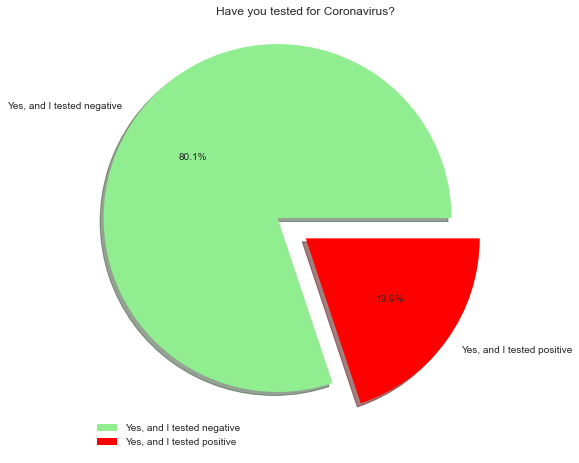

In [18]:
#pie chart
plt.figure(figsize=(12,8))
myexplode = [0.2, 0 ]
plt.pie(covid['i3_health'].value_counts().values, labels =covid['i3_health'].value_counts().keys(), autopct='%1.1f%%',explode = myexplode,shadow = True,colors = ( "lightgreen", "Red"))
plt.title("Have you tested for Coronavirus?")
plt.legend()
plt.show() 

In [20]:
#converting strings to numeric values to reduce memory consumption and increase code efficiency 

covid['i3_health'].replace(['Yes, and I tested negative', 'Yes, and I tested positive'],
                        [0, 1], inplace=True)

In [22]:
#inspecting number of records
covid['i4_health'].value_counts()

Yes, and they tested negative    884
Yes, and they tested positive    184
                                  94
Name: i4_health, dtype: int64

In [23]:
#dropping missing values
covid.drop(covid[covid['i4_health'] == " "].index, inplace = True)

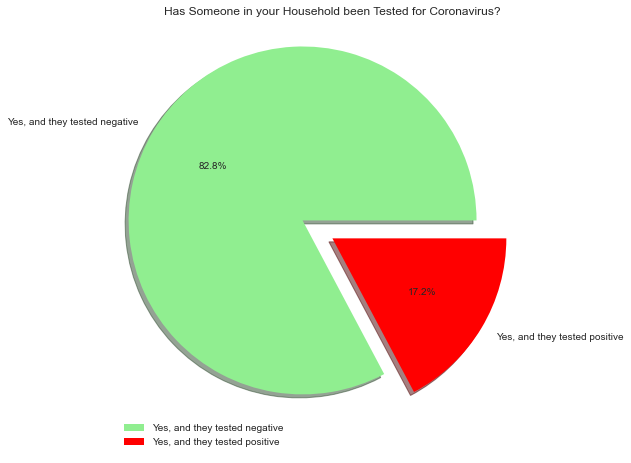

In [24]:
#pie chart showing whether the individual has come into close contact with someone who has covid
plt.figure(figsize=(12,8))
myexplode = [0.2, 0 ]
plt.pie(covid['i4_health'].value_counts().values, labels =covid['i4_health'].value_counts().keys(), autopct='%1.1f%%',explode = myexplode,shadow = True,colors = ( "lightgreen", "Red"))
plt.title("Has Someone in your Household been Tested for Coronavirus?")
plt.legend()
plt.show() 

In [25]:
# string to numeric value conversion
covid['i4_health'].replace(['Yes, and they tested negative', 'Yes, and they tested positive'],
                        [0, 1], inplace=True)

In [26]:
covid['i4_health'].value_counts()

0    884
1    184
Name: i4_health, dtype: int64

In [27]:
# remove missing values in predictor variables
covid.drop(covid[covid['i5_health_1'] == " "].index, inplace = True)
covid.drop(covid[covid['i5_health_2'] == " "].index, inplace = True)
covid.drop(covid[covid['i5_health_3'] == " "].index, inplace = True)
covid.drop(covid[covid['i5_health_4'] == " "].index, inplace = True)
covid.drop(covid[covid['i5_health_5'] == " "].index, inplace = True)
covid.drop(covid[covid['i12_health_5'] == " "].index, inplace = True)

In [28]:
covid['i5_health_1'].value_counts() #note all i5_health_# records have the same amount of missing values, so looking at the count for one of them is sufficient.

No     891
Yes    157
Name: i5_health_1, dtype: int64

In [29]:
# string to int
covid['i5_health_1'].replace(['No', 'Yes'],[0, 1], inplace=True)
covid['i5_health_2'].replace(['No', 'Yes'],[0, 1], inplace=True)
covid['i5_health_3'].replace(['No', 'Yes'],[0, 1], inplace=True)
covid['i5_health_4'].replace(['No', 'Yes'],[0, 1], inplace=True)
covid['i5_health_5'].replace(['No', 'Yes'],[0, 1], inplace=True)
covid['i12_health_5'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [32]:
covid['i12_health_5'].value_counts()

Always        590
Frequently    236
Sometimes     144
Rarely         40
Not at all     38
Name: i12_health_5, dtype: int64

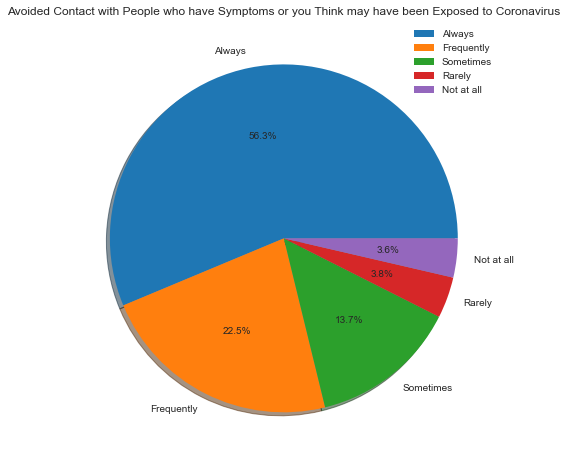

In [33]:
#pie chart depicting the percent of individuals who came into contact with infected individuals or those experiencing symptoms 
plt.figure(figsize=(12,8))
plt.pie(covid['i12_health_5'].value_counts().values, labels =covid['i12_health_5'].value_counts().keys(), autopct='%1.1f%%',shadow = True)
plt.title("Avoided Contact with People who have Symptoms or you Think may have been Exposed to Coronavirus")
plt.legend()
plt.show() 

In [35]:
#Binning categories in predictor variable i12_health_5 to free up memory
covid['i12_health_5'].replace(covid['i12_health_5'].unique().tolist(),
                        [0, 1,2,3,4], inplace=True)

In [36]:
#inspecting regions and states in the clean dataset
covid['region_state'].value_counts()

New York                                             192
Ontario                                              124
California                                           122
Quebec / Québec                                       64
Florida                                               54
Texas                                                 46
British Columbia / Colombie Britanique                38
New Jersey                                            35
Illinois                                              34
Alberta                                               28
Pennsylvania                                          28
Georgia                                               24
Ohio                                                  18
Virginia                                              14
Washington                                            14
Arizona                                               12
Colorado                                              12
Michigan                       

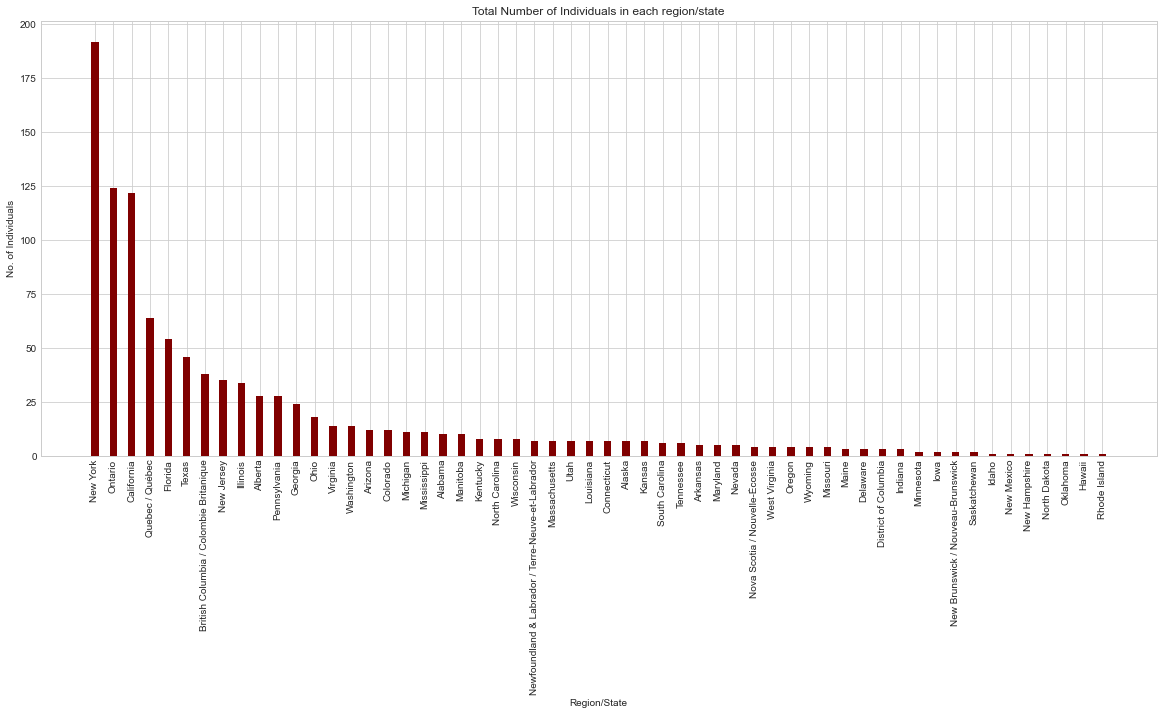

In [38]:
#converting the above list of counts to a bar chart 
fig = plt.figure(figsize = (20, 8))
 
# creating the bar plot
plt.bar(covid['region_state'].value_counts().keys(), covid['region_state'].value_counts().values, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90) 
plt.xlabel("Region/State")
plt.ylabel("No. of Individuals")
plt.title("Total Number of Individuals in each region/state")
plt.show()

In [39]:
#finally all data types are in int
covid.dtypes

RecordNo        object
i3_health        int64
i4_health        int64
i5_health_1      int64
i5_health_2      int64
i5_health_3      int64
i5_health_4      int64
i5_health_5      int64
i12_health_5     int64
region_state    object
dtype: object

In [40]:
#Probability of testing positive given someone in their household has covid
covid.query('i3_health == 1 and i4_health == 1').shape[0]/len(covid)

0.13549618320610687

In [42]:
# No of individuals who tested positive for covid or have someone in their household who also tested positive by region/state
covid.query('i3_health == 1 or i4_health == 1')['region_state'].value_counts()

New York                                             50
California                                           27
Ontario                                              23
Texas                                                18
British Columbia / Colombie Britanique               15
Florida                                               8
Illinois                                              8
Georgia                                               7
Quebec / Québec                                       7
New Jersey                                            6
Pennsylvania                                          6
Mississippi                                           5
Alabama                                               5
Ohio                                                  5
Colorado                                              4
Virginia                                              4
Kansas                                                4
Alaska                                          

### Investigating Covid Test Results & Symptoms

In [44]:
# Number of people with a fever or dry cough in each region/state
covid.query('i5_health_1 == 1 or i5_health_2 == 1')['region_state'].value_counts()

New York                                             51
Ontario                                              30
Texas                                                18
California                                           16
British Columbia / Colombie Britanique               14
Quebec / Québec                                      12
New Jersey                                            8
Georgia                                               8
Illinois                                              8
Alberta                                               7
Pennsylvania                                          6
Florida                                               6
Virginia                                              5
Washington                                            5
Ohio                                                  5
Alabama                                               4
Kansas                                                4
Mississippi                                     

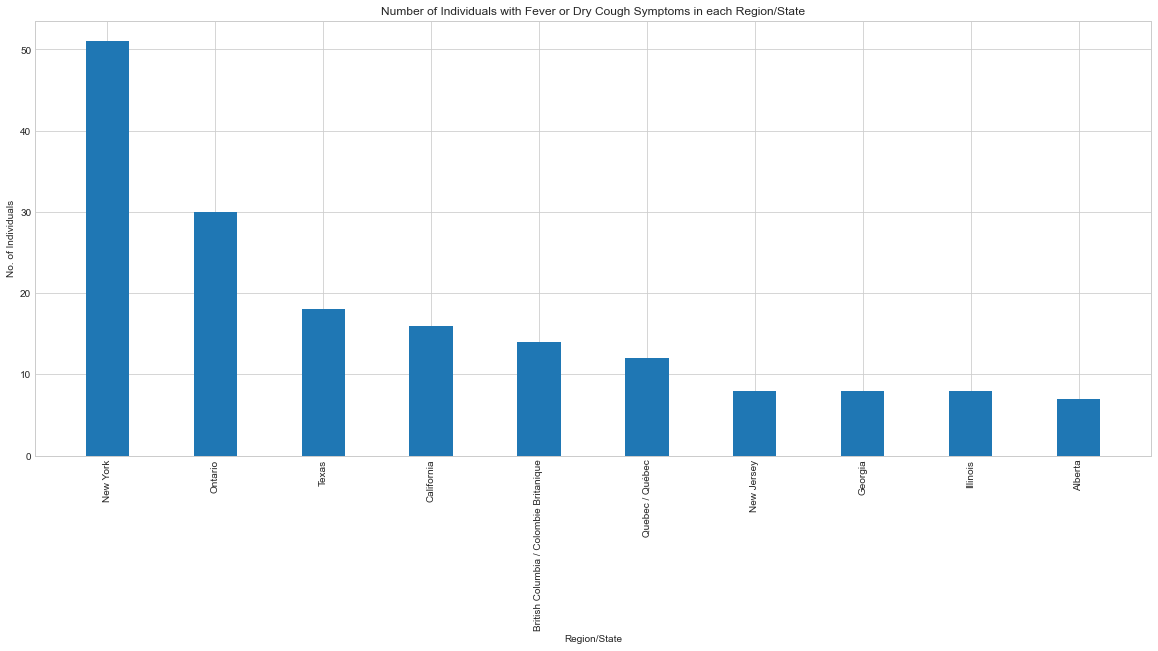

In [45]:
#Number of people with a fever or dry cough in each state
fig = plt.figure(figsize = (20, 8))
stats = covid.query('i5_health_1 == 1 or i5_health_2 == 1')['region_state'].value_counts().head(10).keys()
values = covid.query('i5_health_1 == 1 or i5_health_2 == 1')['region_state'].value_counts().head(10).values
 
# creating the bar plot
plt.bar(stats, values, width = 0.4)
plt.xticks(rotation=90) 
plt.xlabel("Region/State")
plt.ylabel("No. of Individuals")
plt.title("Number of Individuals with Fever or Dry Cough Symptoms in each Region/State")
plt.show()

In [46]:
# Number of people with Loss of sense of smell,taste, shortness of breath or difficulty breathing in each region/state
covid.query('i5_health_3 == 1 or i5_health_4 == 1 or i5_health_5 == 1')['region_state'].value_counts()

New York                                             63
Ontario                                              34
California                                           34
Texas                                                18
British Columbia / Colombie Britanique               17
Illinois                                             15
Florida                                              15
New Jersey                                           15
Quebec / Québec                                      11
Ohio                                                 11
Virginia                                              7
Alabama                                               7
Pennsylvania                                          6
Mississippi                                           6
Alberta                                               5
Arkansas                                              5
Arizona                                               4
Newfoundland & Labrador / Terre-Neuve-et-Labrado

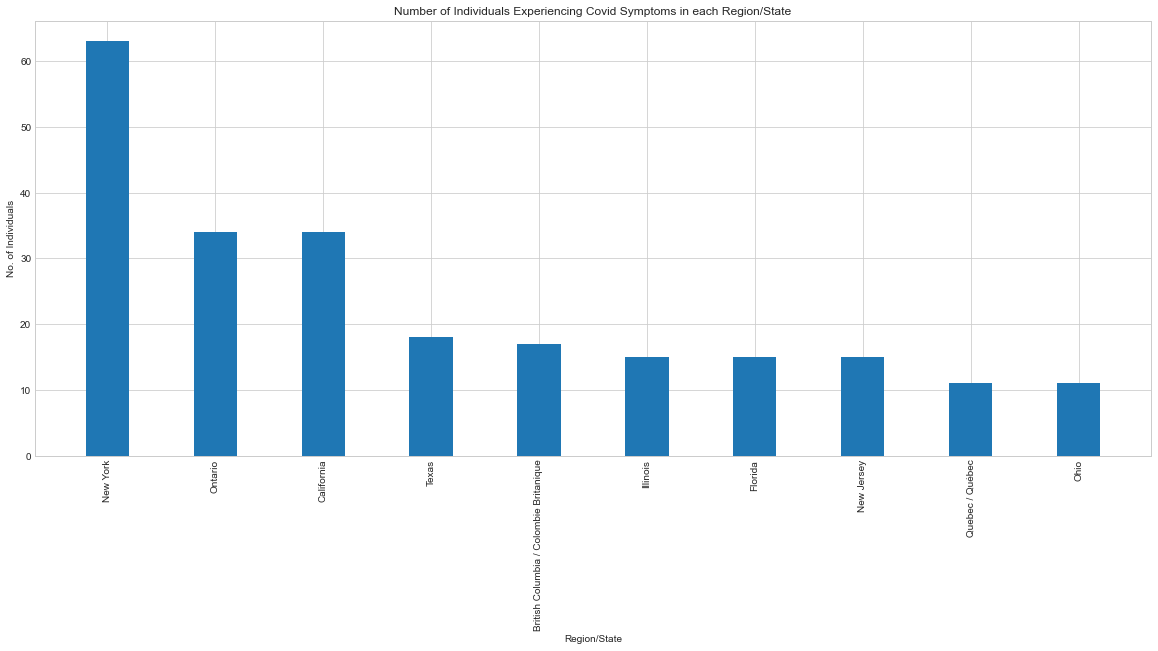

In [48]:

fig = plt.figure(figsize = (20, 8))
stats = covid.query('i5_health_3 == 1 or i5_health_4 == 1 or i5_health_5 == 1')['region_state'].value_counts().head(10).keys()
values = covid.query('i5_health_3 == 1 or i5_health_4 == 1 or i5_health_5 == 1')['region_state'].value_counts().head(10).values
 
# creating the bar plot
plt.bar(stats,values,width = 0.4)
plt.xticks(rotation=90) 
plt.xlabel("Region/State")
plt.ylabel("No. of Individuals")
plt.title("Number of Individuals Experiencing Covid Symptoms in each Region/State")
plt.show()

In [49]:
# probability of testing positive given individual is experiencing symptoms.
covid.query('i5_health_1 == 1 or i5_health_2 == 1 or i5_health_3 == 1or i5_health_4 == 1 or i5_health_5 == 1')['i3_health'].mean()

0.413716814159292

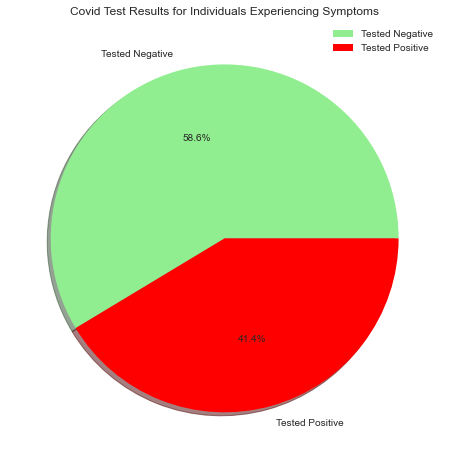

In [51]:
plt.figure(figsize=(12,8))
values = covid.query('i5_health_1 == 1 or i5_health_2 == 1 or i5_health_3 == 1or i5_health_4 == 1 or i5_health_5 == 1')['i3_health'].value_counts().values
labels  = [ 'Tested Negative', 'Tested Positive']
plt.pie(values, labels =labels, autopct='%1.1f%%',shadow = True,colors = ( "lightgreen", "Red"))
plt.title("Covid Test Results for Individuals Experiencing Symptoms") #shows that in the dataset, not everyone who experiencing symptoms tested positive
plt.legend()
plt.show() 

In [54]:
heat_covid = covid[['i3_health','i4_health', 'i5_health_1', 'i5_health_2', 'i5_health_3', 'i5_health_4', 'i5_health_5','i12_health_5']]

In [55]:
# correlation table
heat_covid.corr()

,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5
i3_health,1.000000,0.673681,0.281988,0.263483,0.283141,0.346659,0.294661,-0.071119
i4_health,0.673681,1.000000,0.275043,0.246850,0.195296,0.282142,0.258210,-0.074110
i5_health_1,0.281988,0.275043,1.000000,0.193901,0.141459,0.176389,0.223677,0.025959
i5_health_2,0.263483,0.246850,0.193901,1.000000,0.120227,0.177474,0.219851,-0.038663
i5_health_3,0.283141,0.195296,0.141459,0.120227,1.000000,0.211779,0.173699,-0.085570
i5_health_4,0.346659,0.282142,0.176389,0.177474,0.211779,1.000000,0.243257,-0.026393
i5_health_5,0.294661,0.258210,0.223677,0.219851,0.173699,0.243257,1.000000,0.019566
i12_health_5,-0.071119,-0.074110,0.025959,-0.038663,-0.085570,-0.026393,0.019566,1.000000


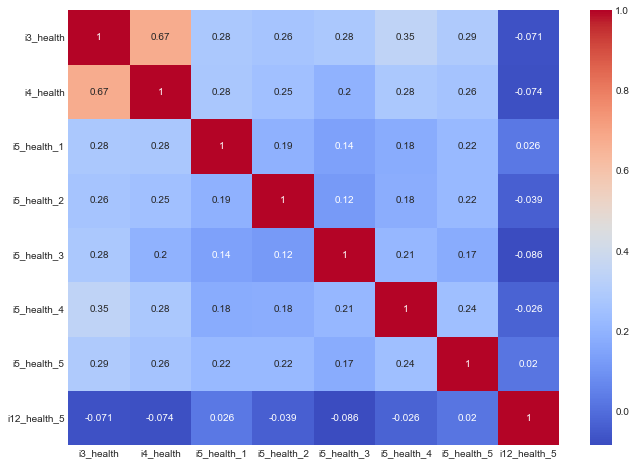

In [56]:
#visualization of above correlation matrix
corr = heat_covid.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

### Entering Model Development Stage

In [59]:
covid.rename(columns = {'i3_health':'Target'}, inplace = True)

In [60]:
#selecting features  
X = covid[['i4_health', 'i5_health_1', 'i5_health_2', 'i5_health_3', 'i5_health_4', 'i5_health_5','i12_health_5']]

In [61]:
y= covid['Target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [63]:
# import the KNeighborsClassifier module
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier()

In [65]:
print("Number of total cases in training set: %d" % y_train.shape)
print("Number of positive cases in training set: %d" % (y_train == 1).sum(axis=0))
print("Number of negative cases in training set: %d" % (y_train == 0).sum(axis=0))
print()
print("Number of total cases in test set: %d" % y_test.shape)
print("Number of positive cases in test set: %d" % (y_test == 1).sum(axis=0))
print("Number of negative cases in test set: %d" % (y_test == 0).sum(axis=0))

Number of total cases in training set: 838
Number of positive cases in training set: 164
Number of negative cases in training set: 674

Number of total cases in test set: 210
Number of positive cases in test set: 43
Number of negative cases in test set: 167


#### Hyperparameter Tuning

Using Grid Search Cross Validation technique to choose the optimal hyperparameters (n_neighbors) that yield the best possible performance.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# assigning the dictionary of variables whose optimal value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}

In [69]:
# performing Grid Search CV on knn-model, using 5-cross folds for validation of each criterion
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [70]:
# training the model using best parameters
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [71]:
#printing the results from Grid Search CV
print("The best paramter is: {}" .format(knn_cv.best_params_))

# the best score the chosen parameter achieved
print("The best score achieved is: {}" .format(knn_cv.best_score_))

The best paramter is: {'n_neighbors': 13}
The best score achieved is: 0.893783860849729


In [72]:
# predicting values using the testing data set
y_pred = knn_cv.predict(X_test)

In [74]:
# calculating the mean accuracy for the test data
print("Accuracy score for training set: {}" .format(knn_cv.score(X_train,y_train)))
print("Accuracy score for test set: {}" .format(knn_cv.score(X_test,y_test)))

Accuracy score for training set: 0.9009546539379475
Accuracy score for test set: 0.9


In [75]:
# performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [78]:
# classification report & confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       167
           1       0.89      0.58      0.70        43

    accuracy                           0.90       210
   macro avg       0.90      0.78      0.82       210
weighted avg       0.90      0.90      0.89       210

[[164   3]
 [ 18  25]]
